# PCA 实例：人脸识别

https://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html

np.set_printoptions(threshold=np.nan)

In [1]:
import logging

logging.basicConfig(level=logging.INFO)

In [2]:
from sklearn.datasets import fetch_olivetti_faces

data_home = './datasets/'

faces = fetch_olivetti_faces(data_home=data_home)
logging.info('Done with load dataset')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to ./datasets/


INFO:root:Done with load dataset


In [4]:
# 400 张图片，4096 个像素，即 4096 个特征
X = faces.data
X.shape

(400, 4096)

In [5]:
import numpy as np

X = faces.data  # 400 张图
y = faces.target

In [8]:
# 40 个人
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [7]:
for i in range(40):
    print(y[i * 10:i * 10 + 10])

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2]
[3 3 3 3 3 3 3 3 3 3]
[4 4 4 4 4 4 4 4 4 4]
[5 5 5 5 5 5 5 5 5 5]
[6 6 6 6 6 6 6 6 6 6]
[7 7 7 7 7 7 7 7 7 7]
[8 8 8 8 8 8 8 8 8 8]
[9 9 9 9 9 9 9 9 9 9]
[10 10 10 10 10 10 10 10 10 10]
[11 11 11 11 11 11 11 11 11 11]
[12 12 12 12 12 12 12 12 12 12]
[13 13 13 13 13 13 13 13 13 13]
[14 14 14 14 14 14 14 14 14 14]
[15 15 15 15 15 15 15 15 15 15]
[16 16 16 16 16 16 16 16 16 16]
[17 17 17 17 17 17 17 17 17 17]
[18 18 18 18 18 18 18 18 18 18]
[19 19 19 19 19 19 19 19 19 19]
[20 20 20 20 20 20 20 20 20 20]
[21 21 21 21 21 21 21 21 21 21]
[22 22 22 22 22 22 22 22 22 22]
[23 23 23 23 23 23 23 23 23 23]
[24 24 24 24 24 24 24 24 24 24]
[25 25 25 25 25 25 25 25 25 25]
[26 26 26 26 26 26 26 26 26 26]
[27 27 27 27 27 27 27 27 27 27]
[28 28 28 28 28 28 28 28 28 28]
[29 29 29 29 29 29 29 29 29 29]
[30 30 30 30 30 30 30 30 30 30]
[31 31 31 31 31 31 31 31 31 31]
[32 32 32 32 32 32 32 32 32 32]
[33 33 33 33 33 33 33 33 33 33]
[34 34 34 34

In [9]:
targets = np.unique(faces.target)
target_names = np.array(["c{}".format(t) for t in targets])
target_names

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28',
       'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37',
       'c38', 'c39'], dtype='<U3')

In [37]:
print('target_names.shape', target_names.shape)

target_names.shape (40,)


In [39]:
n_targets = target_names.shape[0]
n_targets

40

In [41]:
print('faces.images.shape', faces.images.shape)
64 * 64

faces.images.shape (400, 64, 64)


4096

In [42]:
n_samples, h, w = faces.images.shape

图片识别领域，一般情况下使用黑白照片就可以了，可以减少计算量，也会让模型更准确。

In [65]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    '''显示图片阵列'''

    plt.figure(figsize=(2 * n_col, 2.2 * n_row), dpi=144)
    # 设置边距
    # plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')

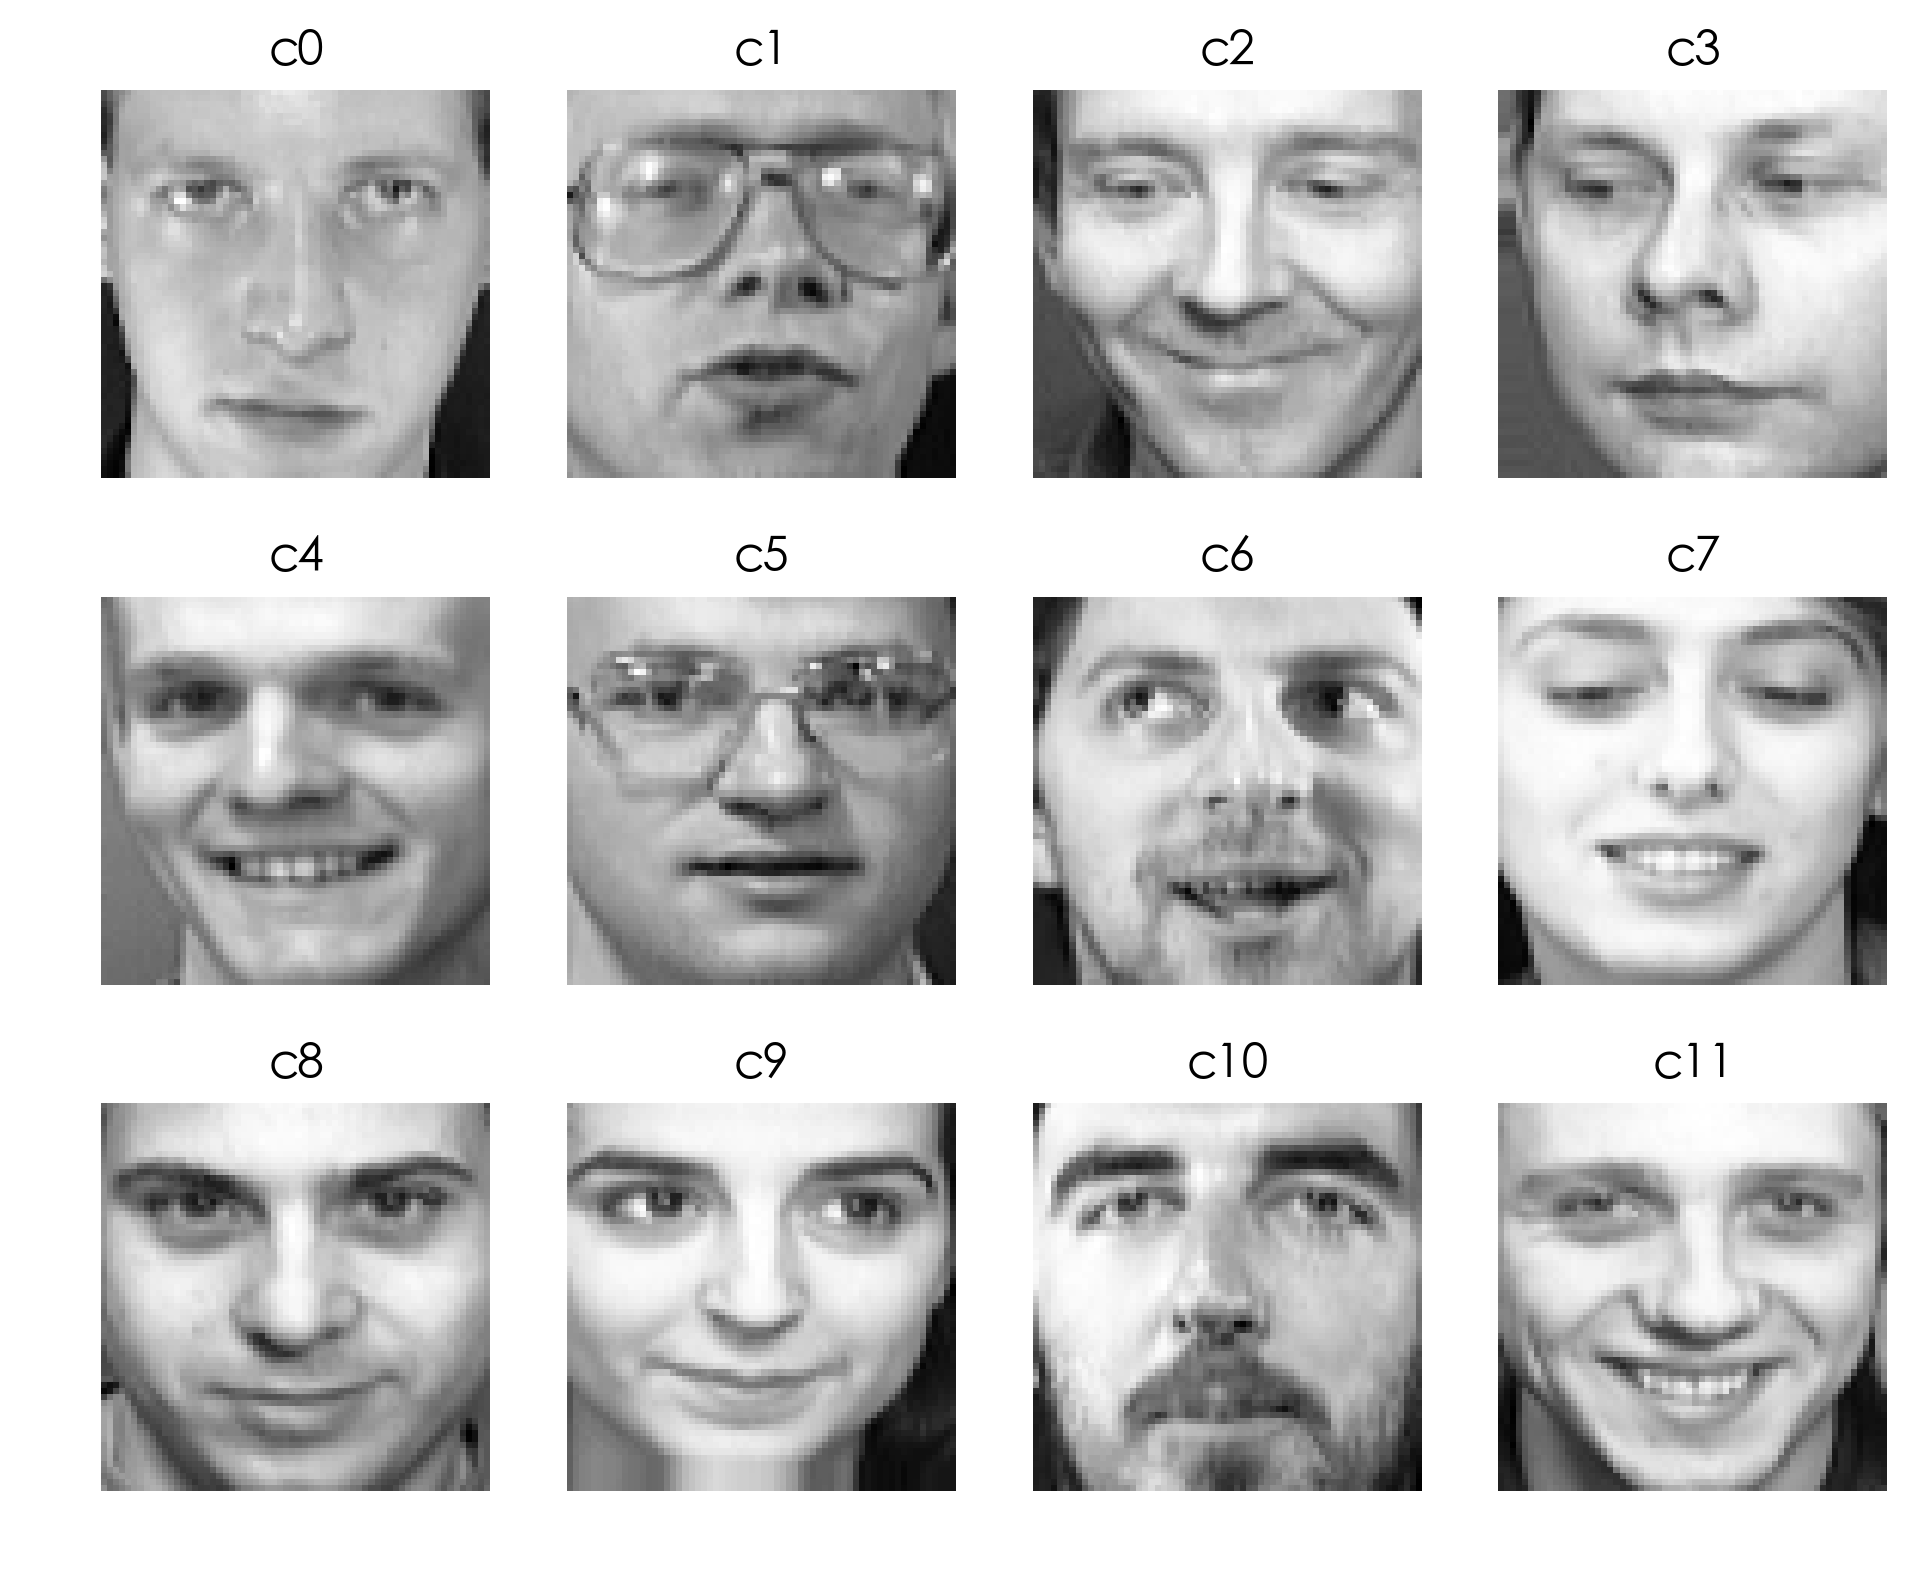

In [66]:
n_row = 3
n_col = 4
sample_images = None
sample_titles = []

# n_targets = 40
for i in range(n_targets):
    people_images = X[y == i]
    people_sample_index = np.random.randint(0, people_images.shape[0],
                                            1)  # 随机选择一张图片
    people_sample_image = people_images[people_sample_index, :]
    # print(sample_images)
    if sample_images is not None:
        sample_images = np.concatenate(
            (sample_images, people_sample_image), axis=0)  # 接在下面
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])
plot_gallery(sample_images, sample_titles, h, w, n_row, n_col)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

## class_weight='balanced' 会根据训练样本的数量调整权重

In [67]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
y_pred = clf.predict(X_test)
y_pred

array([11, 11, 11, 11, 11, 11, 28, 28, 34, 28, 34, 34, 11, 28, 11, 11, 11,
       11, 11, 11, 28, 11, 34, 11, 11, 11, 34, 11, 11, 11, 11, 28, 11, 11,
       11, 11, 34, 11, 11, 28, 11, 11, 11, 11, 11, 11, 28, 11, 28, 28, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 28, 11, 34, 28, 11, 11, 11, 11,
       11, 28, 34, 34, 34, 34, 28, 34, 34, 34, 11, 28])

In [82]:
y_test

array([18,  0,  6, 31, 10, 27, 36, 32, 29, 33, 24,  4,  7, 32, 12, 17,  1,
        9,  5,  6, 33, 13,  1, 25, 25, 24, 14, 22,  7, 16, 39,  2, 13,  8,
       20, 12, 35, 18,  8,  1, 22, 12,  8, 13,  2, 26, 19, 26, 23, 36, 31,
       17, 15,  6, 27,  9, 35,  8, 31, 25, 38, 39, 16, 21,  3, 36,  6, 13,
       37, 38, 16, 29, 30, 30, 21, 12, 24, 19, 22, 23])

混淆矩阵：https://www.cnblogs.com/bonelee/p/8610205.html

In [83]:
from sklearn.metrics import confusion_matrix

# np.set_printoptions(threshold=np.nan)
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

         c0       0.00      0.00      0.00         1
         c1       0.00      0.00      0.00         3
         c2       0.00      0.00      0.00         2
         c3       0.00      0.00      0.00         1
         c4       0.00      0.00      0.00         1
         c5       0.00      0.00      0.00         1
         c6       0.00      0.00      0.00         4
         c7       0.00      0.00      0.00         2
         c8       0.00      0.00      0.00         4
         c9       0.00      0.00      0.00         2
        c10       0.00      0.00      0.00         1
        c11       0.00      0.00      0.00         0
        c12       0.00      0.00      0.00         4
        c13       0.00      0.00      0.00         4
        c14       0.00      0.00      0.00         1
        c15       0.00      0.00      0.00         1
        c16       0.00      0.00      0.00         3
        c17       0.00      0.00      0.00   

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [74]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [76]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

In [77]:
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [78]:
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

array([[0, 2],
       [1, 1]])

In [85]:
X_train.shape

(320, 4096)

In [86]:
X_test.shape

(80, 4096)

特征 $4096$ 个，数据才 $400$ 个，训练效果很差劲。

In [91]:
for i in range(10, 300, 30):
    print(i)

10
40
70
100
130
160
190
220
250
280


In [100]:
from sklearn.decomposition import PCA

np.set_printoptions(suppress=False)

candidate_components = range(10, 300, 30)
# 可以解释的方差
explained_ratios = []
for c in candidate_components:
    pca = PCA(n_components=c)
    x_pca = pca.fit_transform(X)
    print(c, sum(pca.explained_variance_ratio_))
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))

10 0.6563390418887138
40 0.8402400213526562
70 0.8830235716304742
100 0.909407588216709
130 0.9281292905216105
160 0.9435363944503479
190 0.956168102886295
220 0.9652978730737232
250 0.9740875188799691
280 0.9811141809550463


In [16]:
candidate_components

range(10, 300, 30)

In [17]:
explained_ratios

[0.6563388,
 0.84080136,
 0.8820379,
 0.908855,
 0.92905974,
 0.94328445,
 0.9561603,
 0.96608484,
 0.9738531,
 0.9810399]

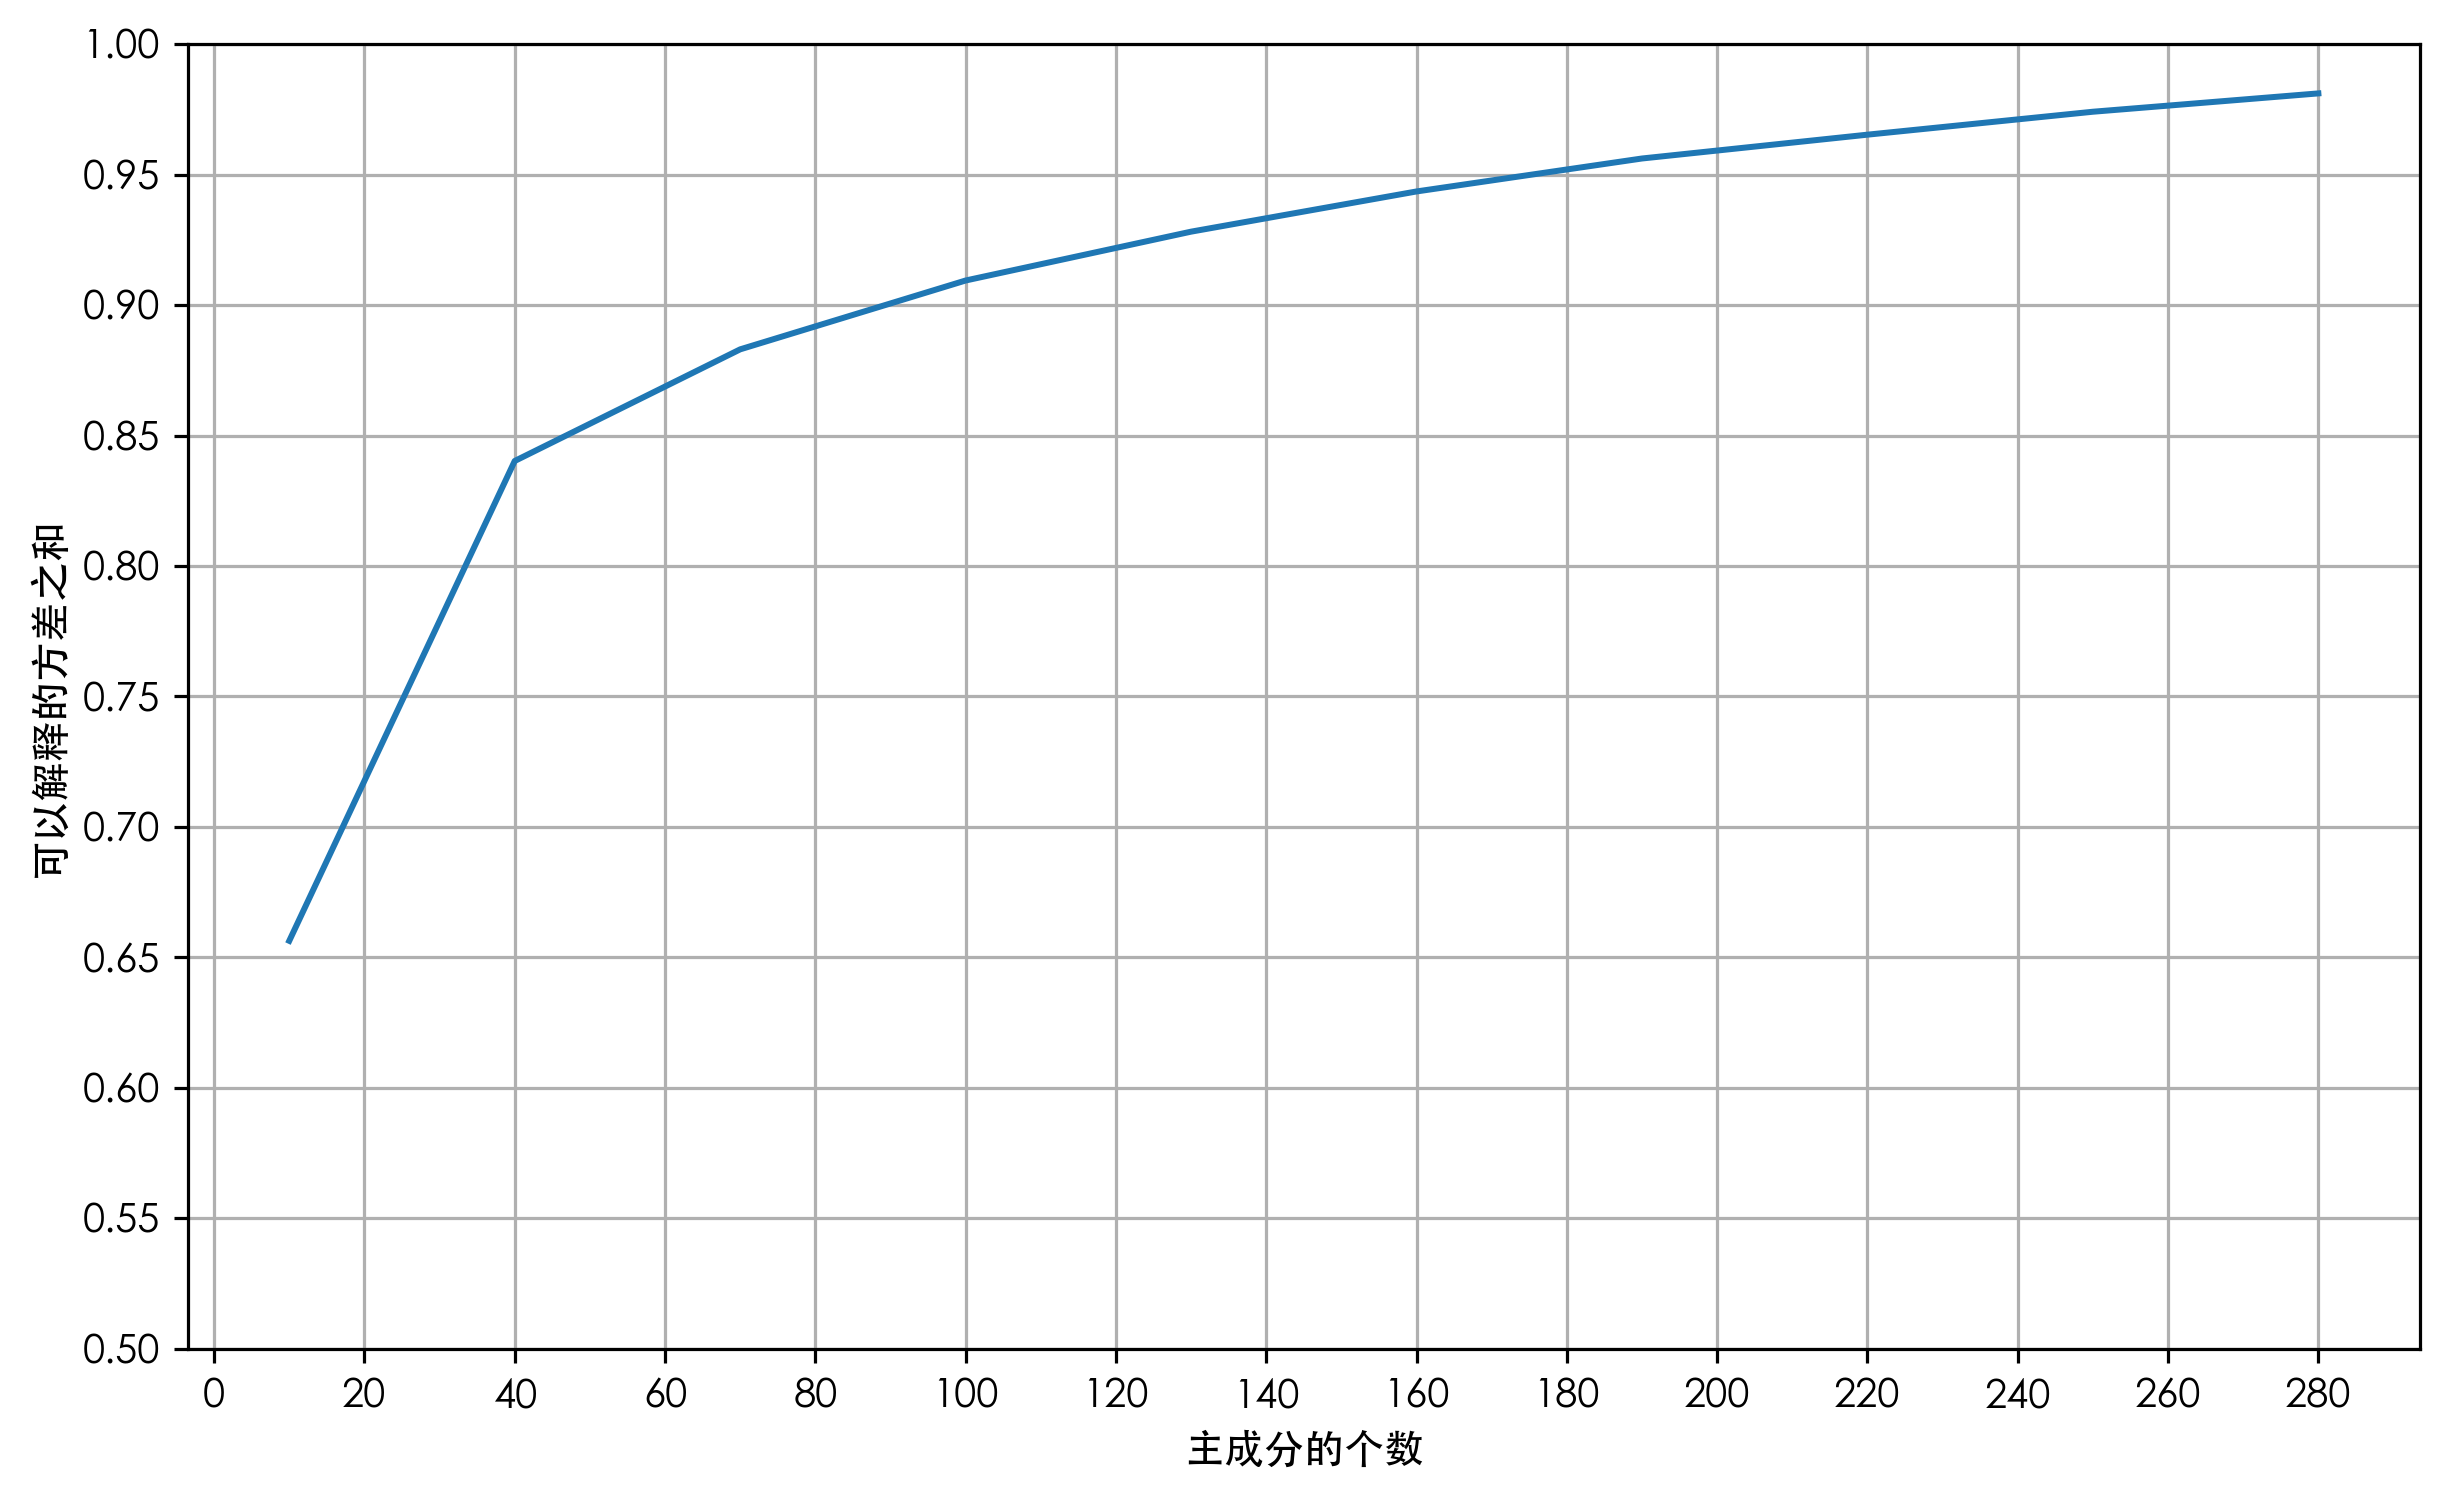

In [101]:
plt.figure(figsize=(10, 6), dpi=100)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('主成分的个数')
plt.ylabel('可以解释的方差之和')
plt.xticks(np.arange(0, 300, 20))
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.show()

In [104]:
n_row = 1
n_col = 5
sample_images = sample_images[0:5]
sample_titles = sample_titles[0:5]

In [105]:
def title_prefix(prefix, title):
    return "{}: {}".format(prefix, title)

In [106]:
plotting_images = sample_images
plotting_titles = [title_prefix('orig', t) for t in sample_titles]
candidate_components = [140, 75, 37, 19, 8]
# 对应百分之 95，90，80，70，60 的情况下的主成分

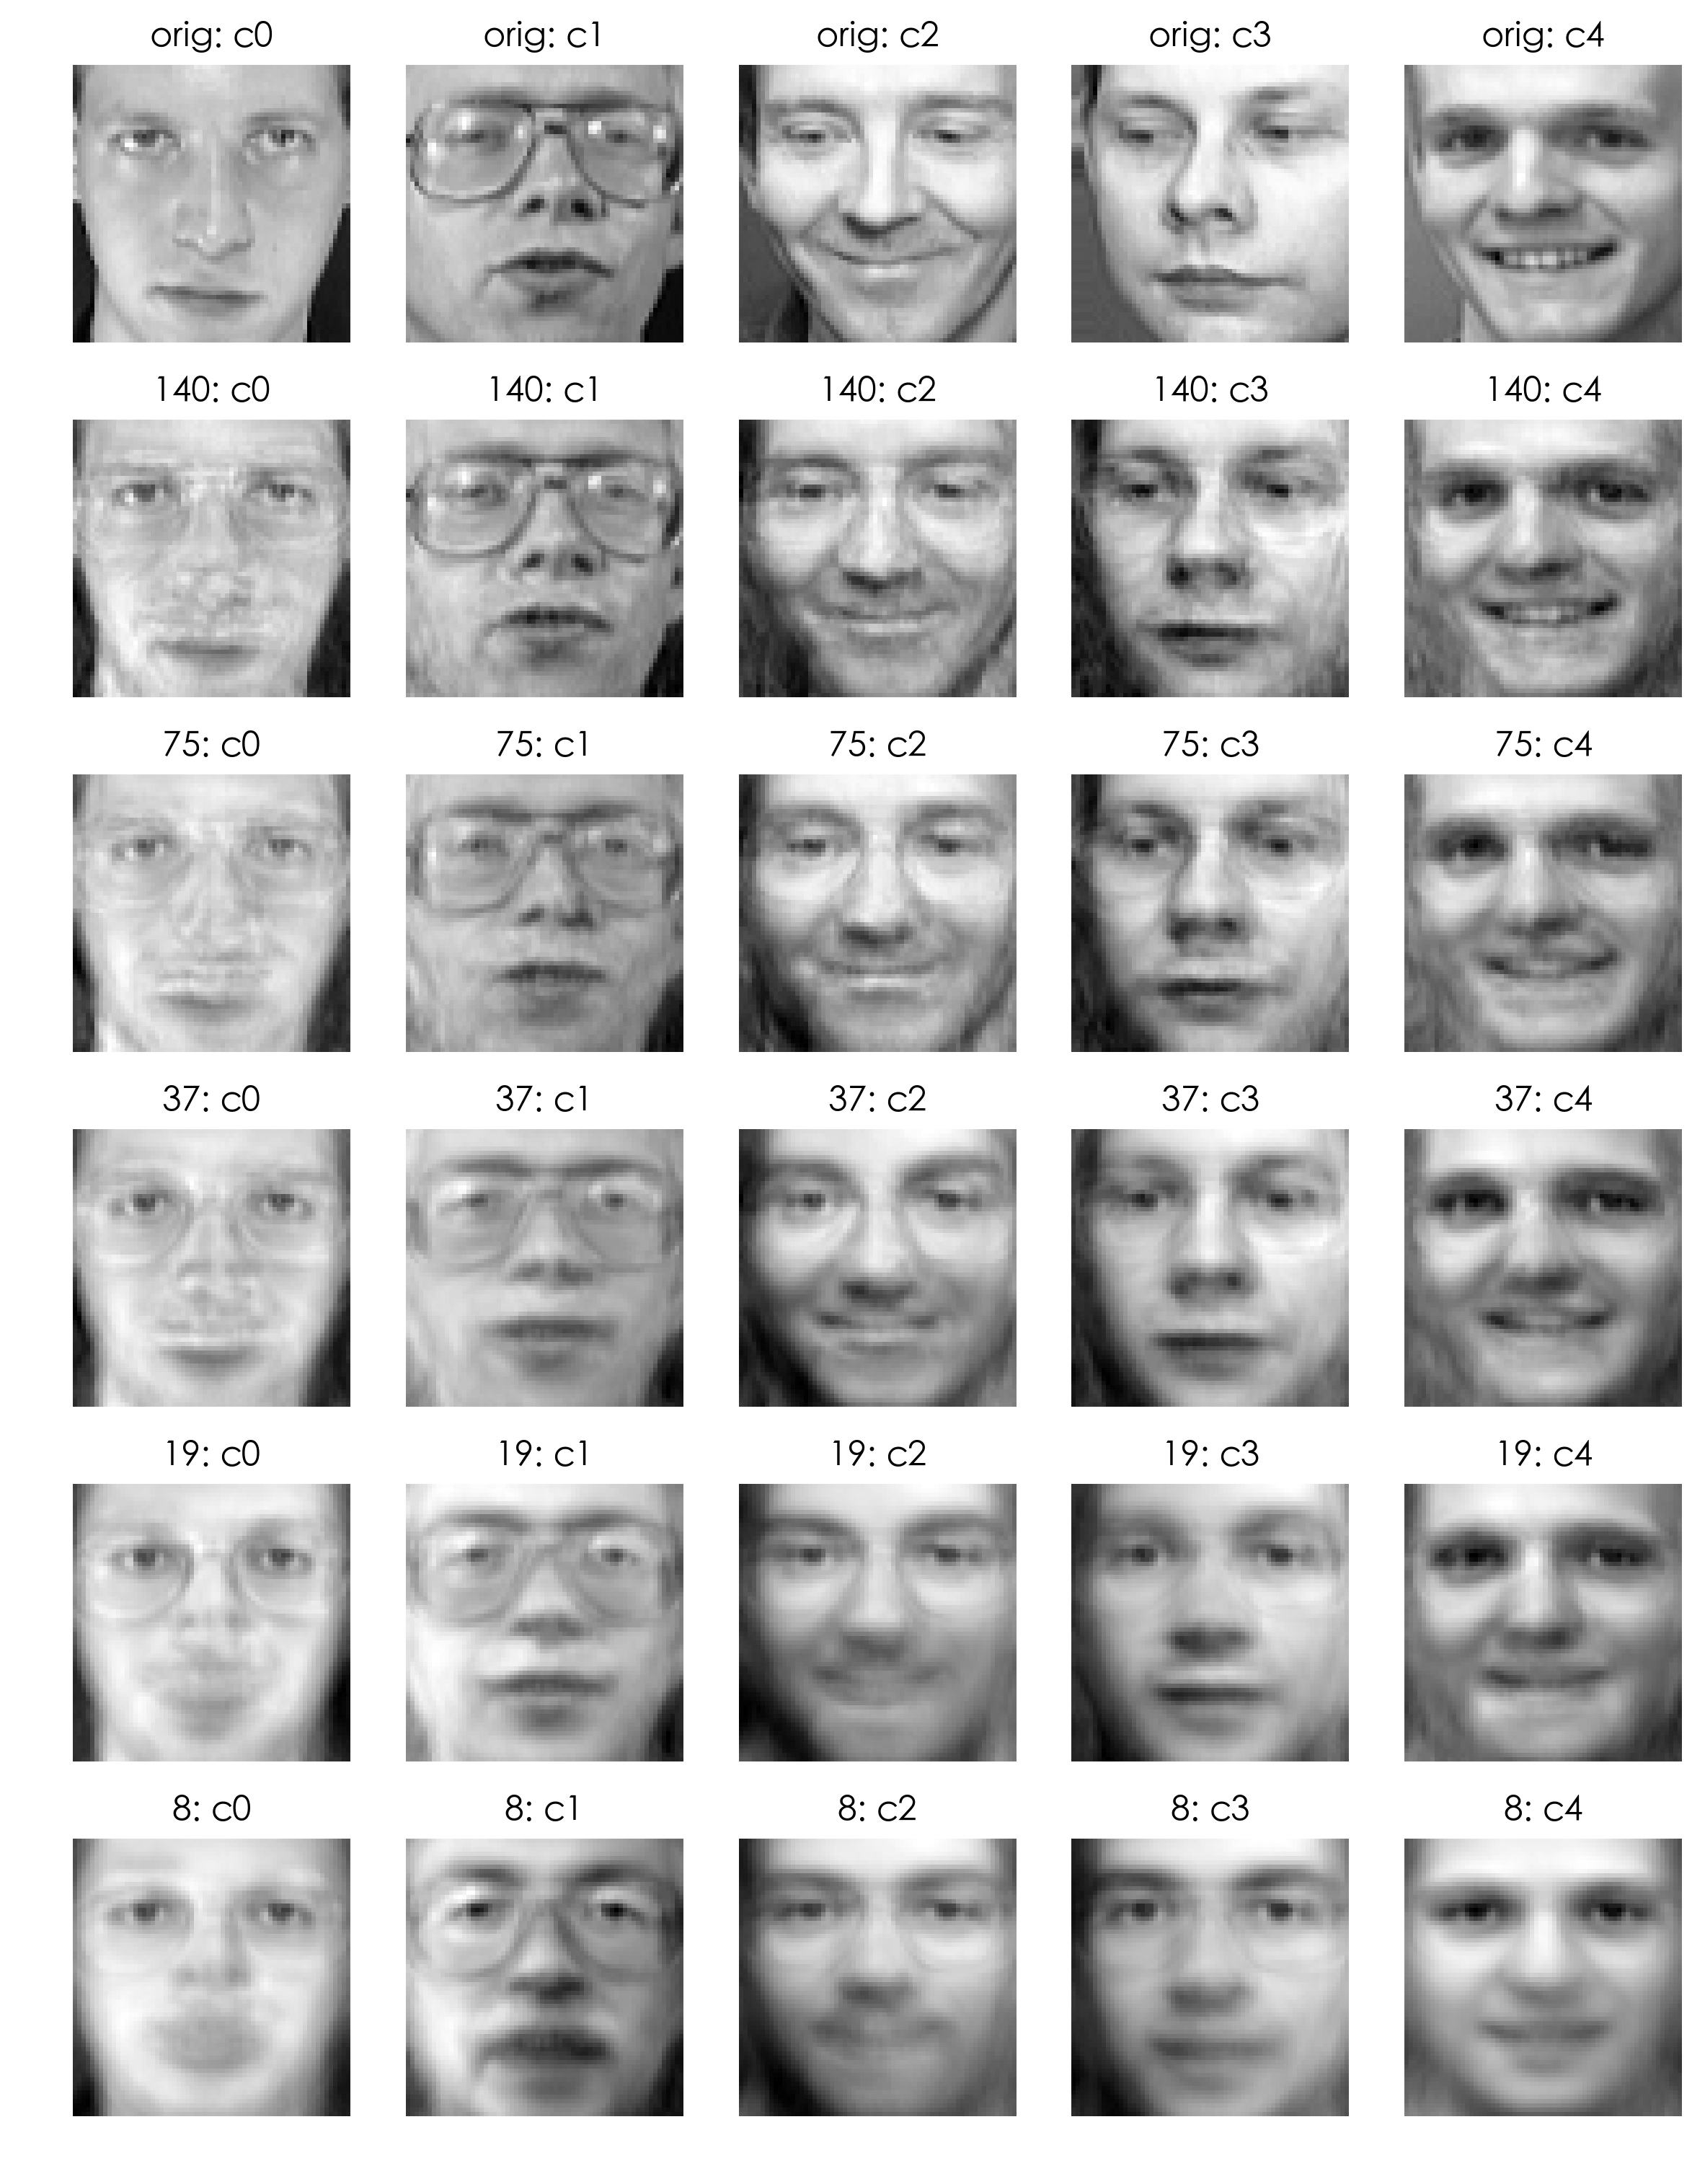

In [107]:
for c in candidate_components:
    pca = PCA(n_components=c)
    pca.fit(X)
    X_sample_pca = pca.transform(sample_images)
    X_sample_pca_inv = pca.inverse_transform(X_sample_pca)
    plotting_images = np.concatenate(
        (plotting_images, X_sample_pca_inv), axis=0)  # 拼在下面
    sample_title_pca = [title_prefix("{}".format(c), t) for t in sample_titles]
    plotting_titles = np.concatenate(
        (plotting_titles, sample_title_pca), axis=0)
plot_gallery(plotting_images, plotting_titles, h, w,
             n_row * (len(candidate_components) + 1), n_col)

接下来，我们就选 140 作为主成分进行降维。

In [28]:
n_component = 140
pca = PCA(n_components=140, svd_solver='randomized', whiten=True)

In [31]:
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

+ 接下来使用网格搜索

In [62]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24084628, 0.3836363 , 0.46316803, 0.51283526, 0.55091965,
       0.58154225, 0.60649455, 0.62792903, 0.6468925 , 0.6633136 ,
       0.6792277 , 0.6943099 , 0.70675415, 0.7179423 , 0.72852015,
       0.7384482 , 0.7473363 , 0.7551144 , 0.76281685, 0.77017635,
       0.77730143, 0.7837719 , 0.7896841 , 0.795513  , 0.8011475 ,
       0.80638677, 0.81130904, 0.81613004, 0.8207798 , 0.8250116 ,
       0.82919794, 0.8327929 , 0.8362794 , 0.839628  , 0.84290284,
       0.8460095 , 0.8489926 , 0.85184085, 0.8546136 , 0.8571906 ,
       0.8596348 , 0.8620109 , 0.8642779 , 0.8664424 , 0.86856574,
       0.87065077, 0.8726499 , 0.8746125 , 0.87650234, 0.8782794 ,
       0.88003635, 0.88173795, 0.88338506, 0.88496983, 0.88653   ,
       0.8880841 , 0.8895715 , 0.8910205 , 0.8924533 , 0.89380884,
       0.89515287, 0.8964593 , 0.89774615, 0.89897645, 0.9001869 ,
       0.9013485 , 0.9025042 , 0.9036142 , 0.9046951 , 0.905768  ,
       0.90682524, 0.90787244, 0.90887684, 0.9098572 , 0.91079

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 5, 10, 50, 100],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'),
    param_grid=param_grid,
    verbose=2,
    n_jobs=-1)
clf.fit(X_train_pca, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] C=1, gamma=0.001 ................................................
[CV] C=1, gamma=0.001 ................................................
[CV] ................................ C=1, gamma=0.0001, total=   0.1s
[CV] ................................ C=1, gamma=0.0005, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] ................................ C=1, gamma=0.0001, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 5, 10, 50, 100], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [37]:
print(clf.best_params_)

{'C': 10, 'gamma': 0.001}


In [40]:
y_test_pred = clf.best_estimator_.predict(X_test_pca)

In [39]:
y_test

array([18,  0,  6, 31, 10, 27, 36, 32, 29, 33, 24,  4,  7, 32, 12, 17,  1,
        9,  5,  6, 33, 13,  1, 25, 25, 24, 14, 22,  7, 16, 39,  2, 13,  8,
       20, 12, 35, 18,  8,  1, 22, 12,  8, 13,  2, 26, 19, 26, 23, 36, 31,
       17, 15,  6, 27,  9, 35,  8, 31, 25, 38, 39, 16, 21,  3, 36,  6, 13,
       37, 38, 16, 29, 30, 30, 21, 12, 24, 19, 22, 23])

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9625

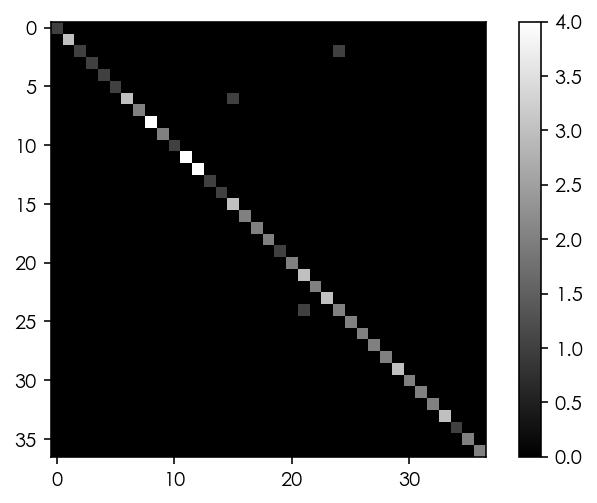

In [45]:
from sklearn.metrics import confusion_matrix

plt.imshow(confusion_matrix(y_test, y_test_pred), cmap=plt.cm.gray)
plt.colorbar()
plt.show()

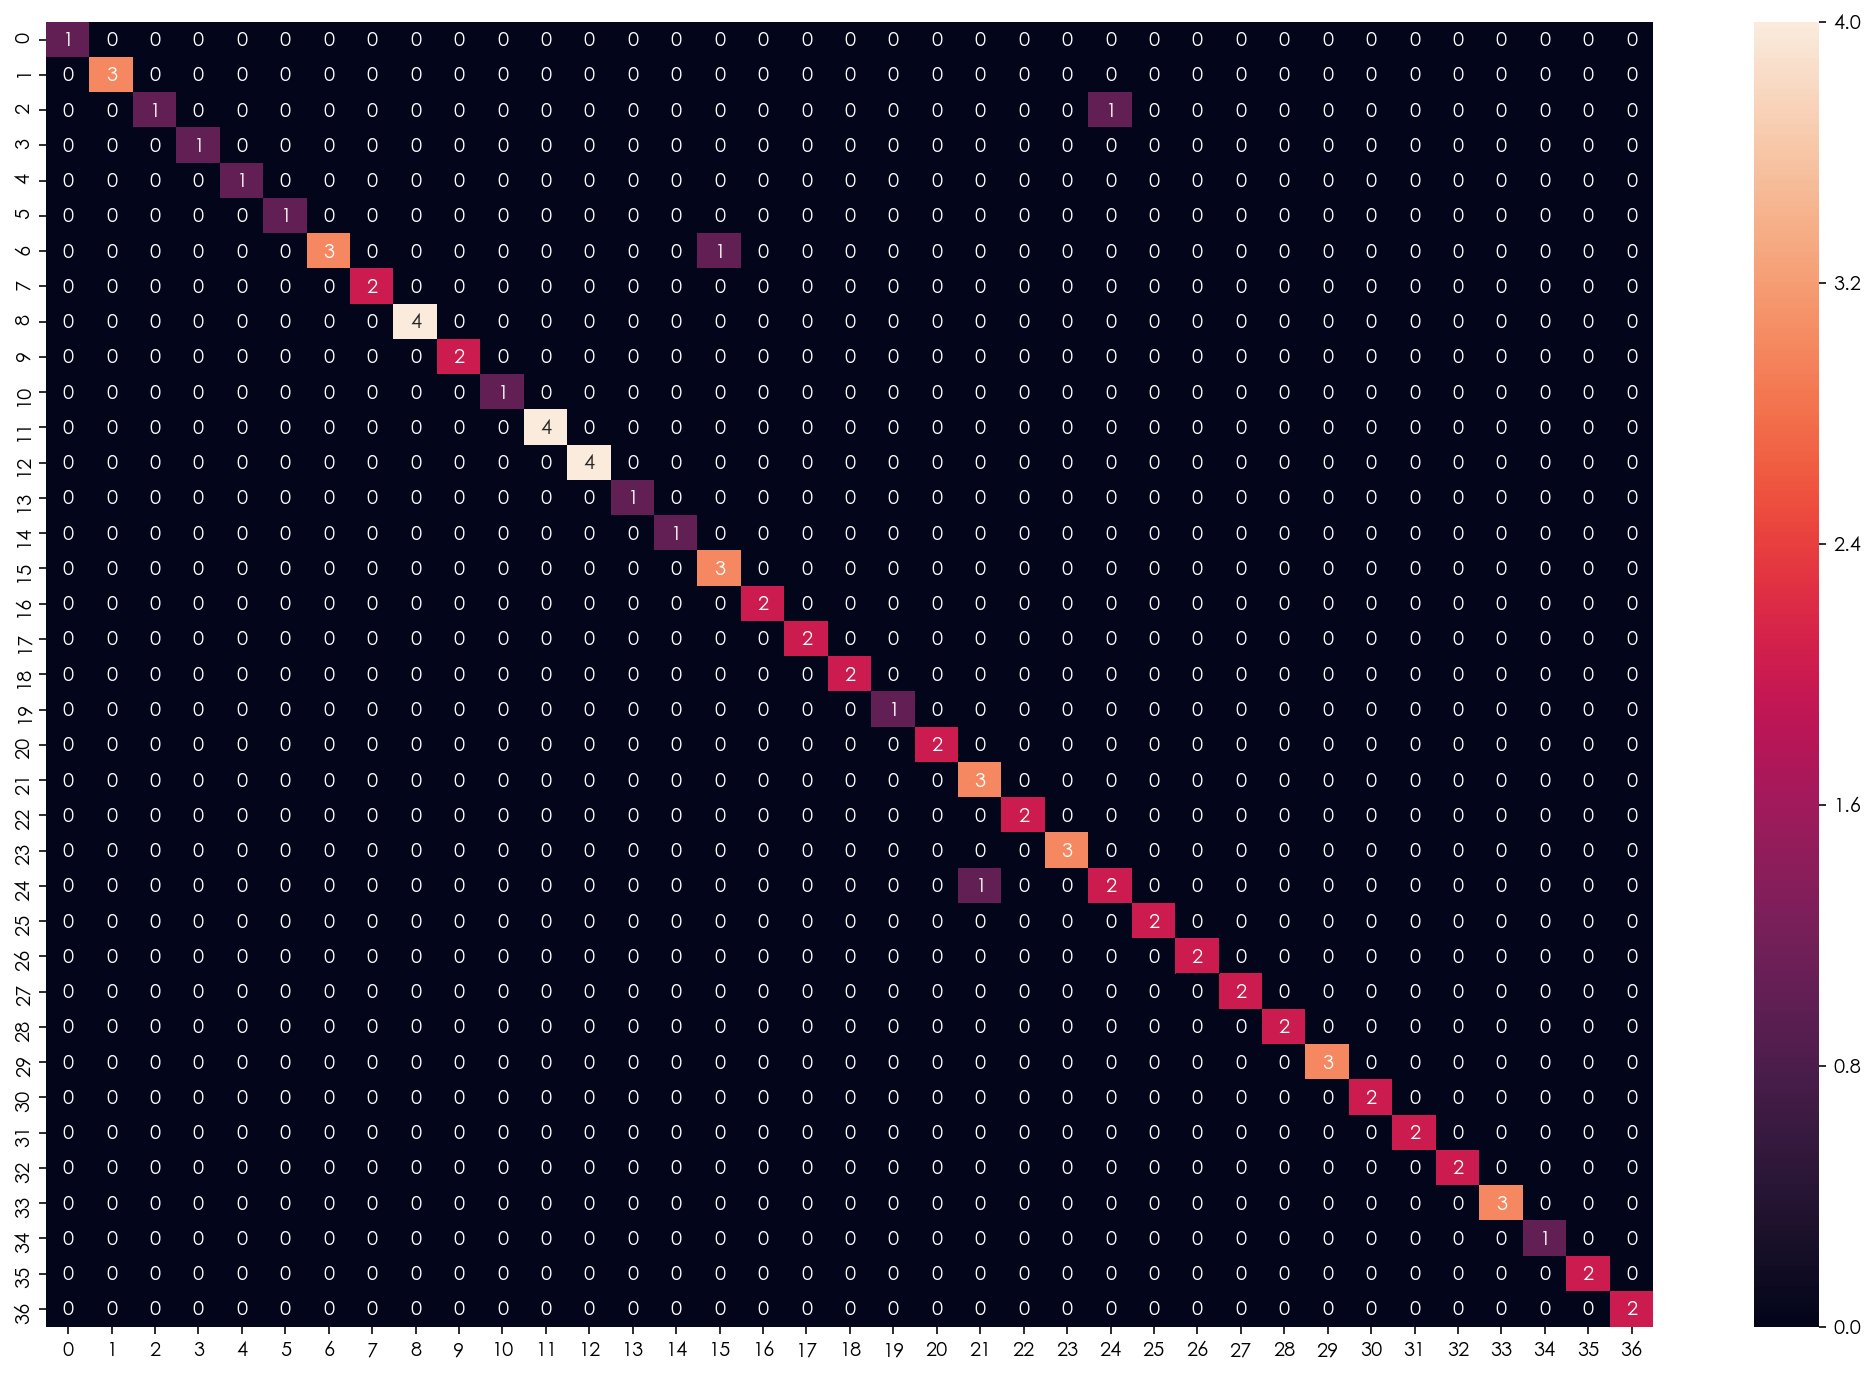

In [52]:
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

In [54]:
np.sum(confusion_matrix(y_test, y_test_pred))

80

In [55]:
len(y_test)

80

下面是一个试验

In [64]:
X_train.shape

(320, 4096)

In [65]:
pca1 = PCA(n_components=4096)

In [66]:
pca1.fit_transform(X_train)

array([[-6.45351887e+00, -1.12743688e+00, -4.91061956e-01,
        -2.23093486e+00, -3.66893500e-01,  1.27110112e+00,
        -1.79170743e-01,  8.90753686e-01, -2.32948875e+00,
        -7.93364763e-01,  9.78922248e-02,  1.15798354e-01,
         5.46714544e-01, -3.19253206e-01, -1.56380296e+00,
         6.94257796e-01,  1.75722432e+00,  2.04571411e-01,
        -4.22879905e-01,  7.54216135e-01, -1.21831560e+00,
         4.78272706e-01, -1.42455637e-01, -2.82524955e-02,
         6.22245967e-01,  4.39257532e-01,  9.49964076e-02,
         1.65256643e+00,  9.21734691e-01,  5.55067837e-01,
        -1.26160407e+00, -6.11503005e-01, -9.46886599e-01,
         3.03205848e-02,  3.64186764e-01, -1.00635898e+00,
        -8.69080007e-01,  6.96916759e-01, -8.48580226e-02,
        -1.00636935e+00,  1.93879068e+00,  1.83563903e-01,
        -1.06258482e-01, -6.35910630e-01,  6.74513638e-01,
         1.14623725e+00,  6.67681694e-01, -2.49604117e-02,
        -5.85423350e-01, -4.21240218e-02, -5.68669736e-0

In [70]:
np.set_printoptions(suppress=True)
np.cumsum(pca1.explained_variance_ratio_)

array([0.24084656, 0.3836366 , 0.46316835, 0.5128357 , 0.55092   ,
       0.5815426 , 0.6064949 , 0.6279294 , 0.64689285, 0.663314  ,
       0.67922807, 0.69431025, 0.70675457, 0.71794283, 0.72852075,
       0.7384488 , 0.74733704, 0.7551152 , 0.7628178 , 0.7701775 ,
       0.77730364, 0.7837768 , 0.78969115, 0.7955228 , 0.8011596 ,
       0.80640405, 0.811334  , 0.81618476, 0.8208723 , 0.82511866,
       0.82933444, 0.83308554, 0.83668095, 0.8401818 , 0.8435306 ,
       0.8467343 , 0.8498818 , 0.8529042 , 0.8558143 , 0.85854197,
       0.8611481 , 0.86373055, 0.86617035, 0.8685634 , 0.8709228 ,
       0.8732122 , 0.87544525, 0.8775959 , 0.8797118 , 0.8817923 ,
       0.88375866, 0.8856824 , 0.8875614 , 0.88939196, 0.89119464,
       0.89292586, 0.8946407 , 0.8963474 , 0.8980092 , 0.8996222 ,
       0.9012189 , 0.9027838 , 0.9043247 , 0.90582114, 0.907283  ,
       0.90871966, 0.9101242 , 0.91148555, 0.9128259 , 0.91411763,
       0.9154037 , 0.91665846, 0.9178954 , 0.9191157 , 0.92032